# Exact adversarial examples

In [77]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn
import data
from stump_ensemble import StumpEnsemble

%matplotlib inline
seaborn.set(font_scale=2)
seaborn.set_style("white")
np.random.seed(1)
np.set_printoptions(precision=6, suppress=True)

dataset = 'mnist_1_5'
# dataset = 'mnist_2_6'
# dataset = 'fmnist_sandal_sneaker'
# dataset = 'gts_100_roadworks'
# dataset = 'gts_30_70'
_, _, X_test, y_test, eps = data.all_datasets_dict[dataset]()
if 'gts' in dataset:
    img_shape = (32, 32, 3)
elif 'mnist' in dataset:
    img_shape = (28, 28)
else:
    raise ValueError('wrong dataset for getting img_shape')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Model name: 2019-05-21 15:41:28 dataset=mnist_2_6 model=plain n_train=-1 n_trials_coord=10 eps=0.300 lr=1.0
Ensemble of 415 learners restored: exps/2019-05-21 15:41:28 dataset=mnist_2_6 model=plain n_train=-1 n_trials_coord=10 eps=0.300 lr=1.0.model
eps_max=0.000, eps_delta=0.000, yf=19.647, nnz=0
eps_max=0.002, eps_delta=0.002, yf=19.109, nnz=1
eps_max=0.002, eps_delta=0.002, yf=19.109, nnz=1
eps_max=0.002, eps_delta=0.002, yf=19.109, nnz=1
eps_max=0.002, eps_delta=0.002, yf=-26.154, nnz=21

Model name: 2019-05-21 15:41:28 dataset=mnist_2_6 model=robust_bound n_train=-1 n_trials_coord=10 eps=0.300 lr=1.0
Ensemble of 364 learners restored: exps/2019-05-21 15:41:28 dataset=mnist_2_6 model=robust_bound n_train=-1 n_trials_coord=10 eps=0.300 lr=1.0.model
eps_max=0.000, eps_delta=0.000, yf=4.478, nnz=0
eps_max=0.016, eps_delta=0.000, yf=4.478, nnz=0
eps_max=0.020, eps_delta=0.020, yf=4.276, nnz=1
eps_max=0.031, eps_delta=0.031, yf=4.276, nnz=1
eps_max=0.047, eps_delta=0.047, yf=4.276, nnz=

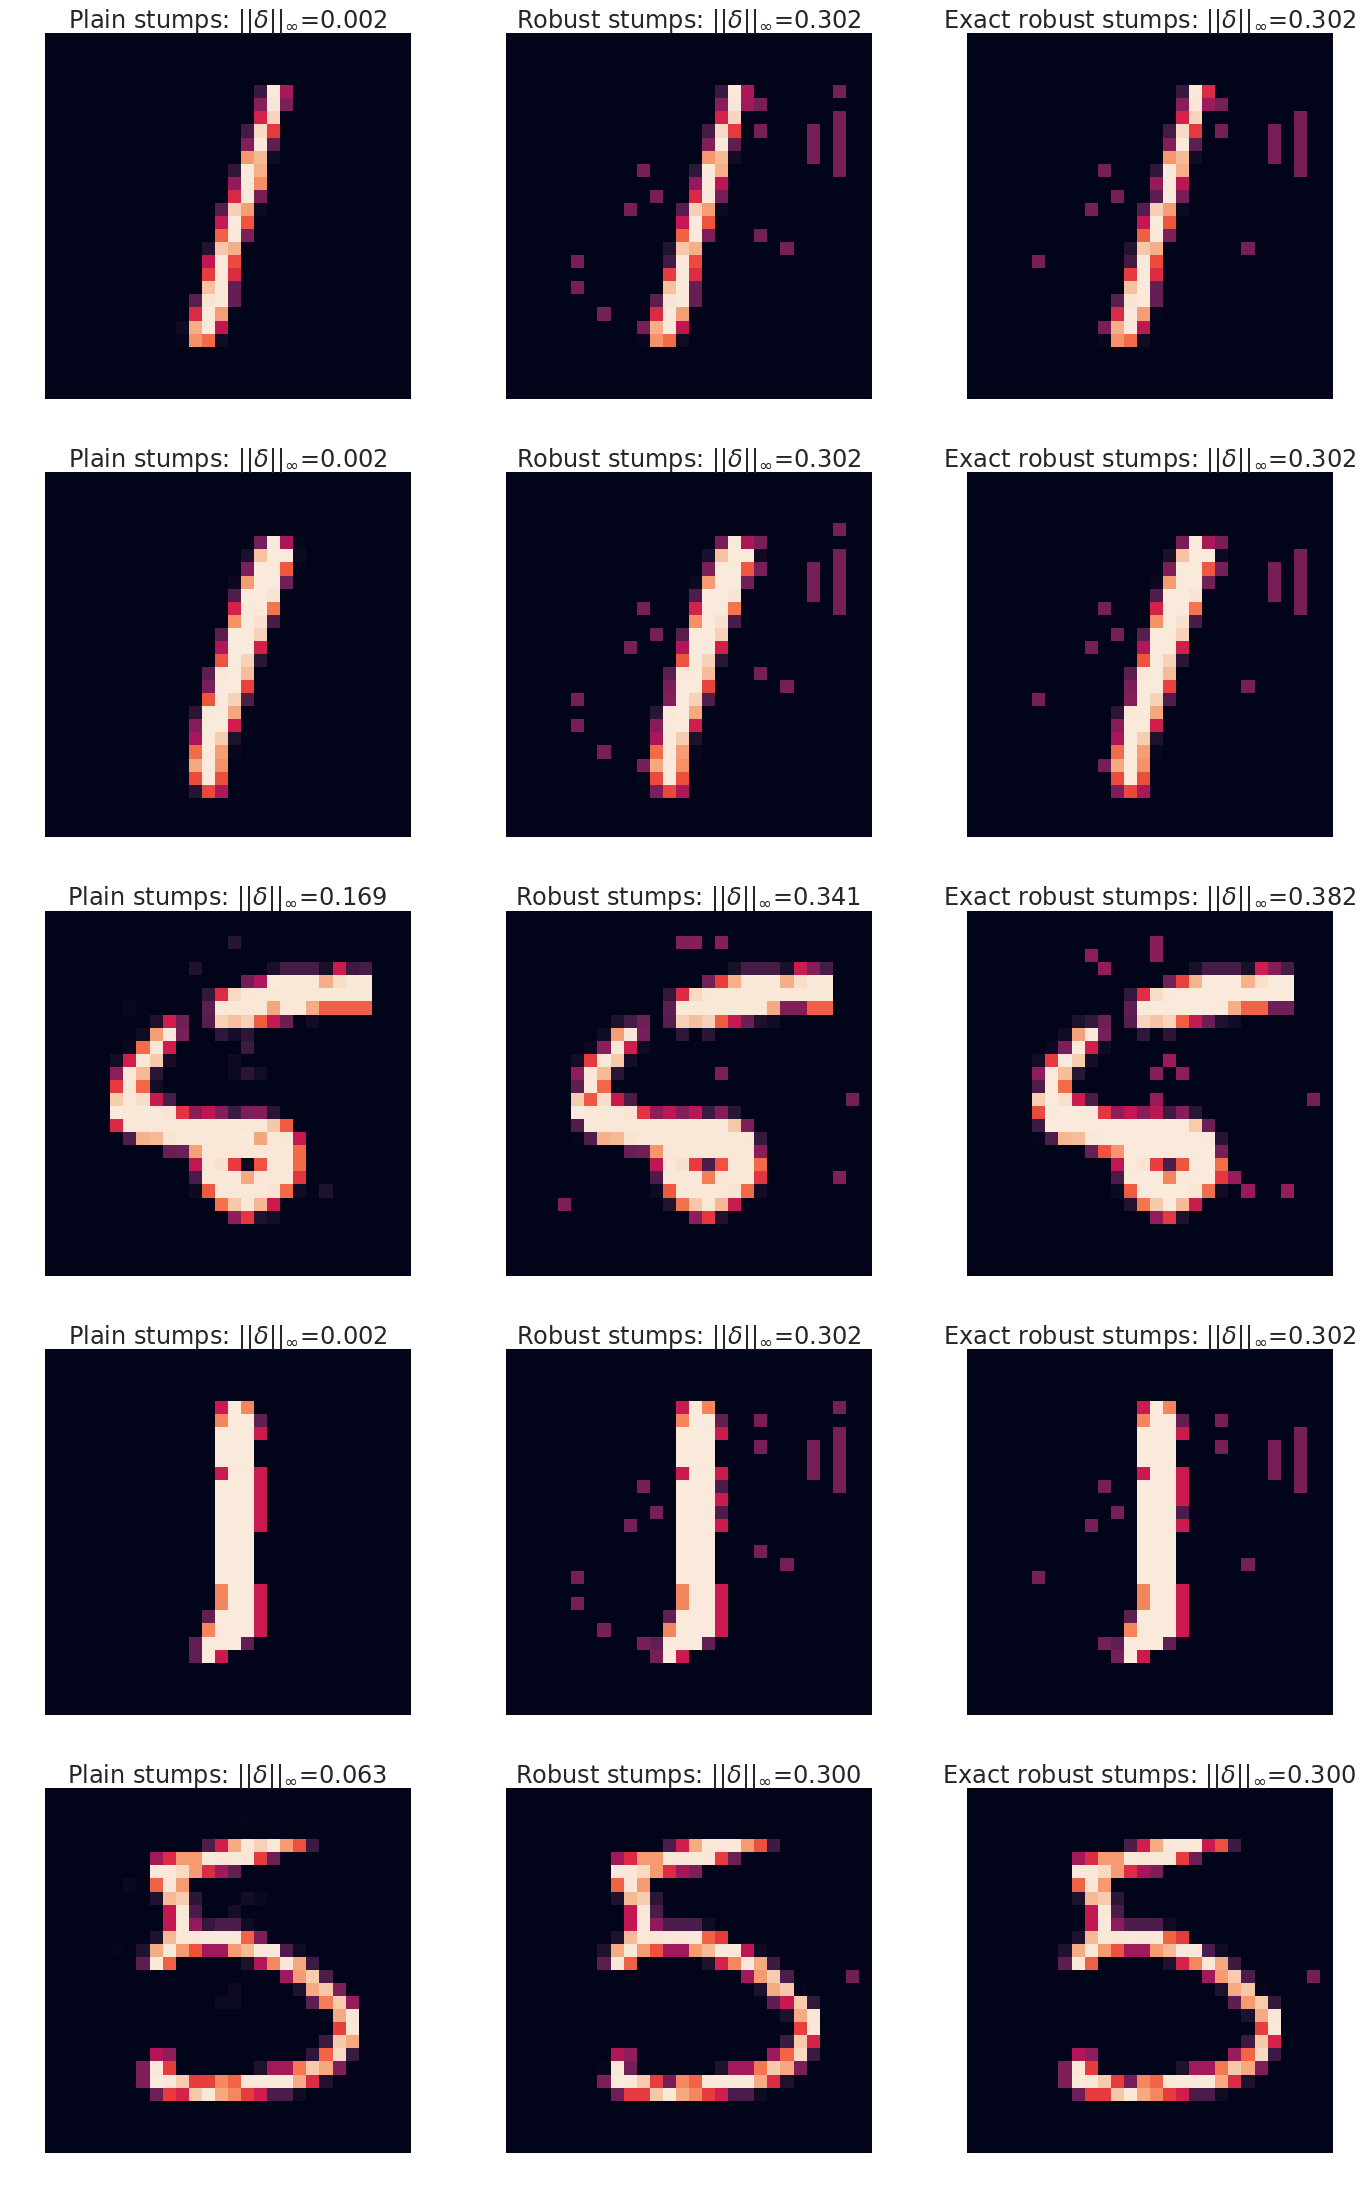

In [78]:
exp_folder = 'exps'
model_names = {
    'mnist_1_5': 
        ['2019-05-21 15:41:28 dataset=mnist_2_6 model=plain n_train=-1 n_trials_coord=10 eps=0.300 lr=1.0',
         '2019-05-21 15:41:28 dataset=mnist_2_6 model=robust_bound n_train=-1 n_trials_coord=10 eps=0.300 lr=1.0',
         '2019-05-21 15:41:28 dataset=mnist_2_6 model=robust_exact n_train=-1 n_trials_coord=10 eps=0.300 lr=1.0'
         ],
    'mnist_2_6': 
        ['2019-05-25 11:21:22 dataset=mnist_2_6 weak_learner=stump model=plain n_train=-1 n_trials_coord=10 eps=0.300 max_depth=4 lr=1.0',
         '2019-05-25 11:21:22 dataset=mnist_2_6 weak_learner=stump model=robust_bound n_train=-1 n_trials_coord=10 eps=0.300 max_depth=4 lr=1.0',
         '2019-05-25 11:21:22 dataset=mnist_2_6 weak_learner=stump model=robust_exact n_train=-1 n_trials_coord=10 eps=0.300 max_depth=4 lr=1.0'
         ],
    'fmnist_sandal_sneaker': 
        ['2019-05-21 15:41:28 dataset=fmnist_sandal_sneaker model=plain n_train=-1 n_trials_coord=10 eps=0.100 lr=1.0',
         '2019-05-21 15:41:29 dataset=fmnist_sandal_sneaker model=robust_bound n_train=-1 n_trials_coord=10 eps=0.100 lr=1.0',
         '2019-05-21 15:41:28 dataset=fmnist_sandal_sneaker model=robust_exact n_train=-1 n_trials_coord=10 eps=0.100 lr=1.0',
         ],
    'gts_100_roadworks':
        ['2019-05-21 18:47:22 dataset=gts_120_warning model=plain n_train=-1 n_trials_coord=10 eps=0.031 lr=1.0',
         '2019-05-21 18:47:22 dataset=gts_120_warning model=robust_bound n_train=-1 n_trials_coord=10 eps=0.031 lr=1.0',
         '2019-05-21 18:47:22 dataset=gts_120_warning model=robust_exact n_train=-1 n_trials_coord=10 eps=0.031 lr=1.0'
         ],
    'gts_30_70': 
        ['2019-05-21 18:47:22 dataset=gts_30_70 model=plain n_train=-1 n_trials_coord=10 eps=0.031 lr=1.0',
         '2019-05-21 18:47:22 dataset=gts_30_70 model=robust_bound n_train=-1 n_trials_coord=10 eps=0.031 lr=1.0',
         '2019-05-21 18:47:22 dataset=gts_30_70 model=robust_exact n_train=-1 n_trials_coord=10 eps=0.031 lr=1.0']
}[dataset]

idx_examples = np.arange(5)

plot_height = 6
fig_width = 1.3*len(model_names)*plot_height
fig_height = 1.3*len(idx_examples)*plot_height
fig, axs = plt.subplots(len(idx_examples), len(model_names), figsize=(fig_width, fig_height))

for i_ex in idx_examples:
    for i, model_name in enumerate(model_names):
        print('Model name: {}'.format(model_name))
        model = model_name.split('model=')[1].split(' ')[0]
        # weak_learner = model_name.split('weak_learner=')[1].split(' ')[0]  # doesn't exist for stumps
        weak_learner = 'stump'
        eps = model_name.split('eps=')[1].split(' ')[0]
        
        model_path = model_name + '.model'
        metrics_path = model_name + '.metrics'
        metrics = np.loadtxt(exp_folder + '/' + metrics_path)
        valid_errs, valid_adv_errs = metrics[:, 8], metrics[:, 10]
        # Model selection
        best_iter = np.argmin(valid_errs) if model == 'plain' else np.argmin(valid_adv_errs)
        
        if model == 'robust_bound':
            model = 'robust'
        elif model == 'robust_exact':
            model = 'exact robust'
    
        ensemble = StumpEnsemble('stump', 10, 1.0)  # the hps here do not matter (they matter only for training)
        ensemble.load('exps/{}'.format(model_path), iteration=best_iter)
        
        delta = ensemble.exact_adv_example(X_test[None, i_ex], y_test[None, i_ex])
    
        dataset_ = dataset.upper().replace('_', ' ').replace('120 WARNING', '120-warn').replace('2 6', '2-6')
        plot_name_short = '{} stumps: $||\delta||_\infty$={:.3f}'.format(model.capitalize(), np.abs(delta).max())
        ax = axs[i_ex - min(idx_examples)][i]
        ax.imshow((X_test[i_ex] + delta).reshape(img_shape))
        ax.axis('off')
        ax.set_title(plot_name_short)
    
plot_name_save = 'exact_adv-dataset={}-weak_learner=stump'.format(dataset)
# fig.tight_layout()
# fig.subplots_adjust(wspace=0.25)
plt.savefig('plots/{}.pdf'.format(plot_name_save), bbox_inches='tight')

